In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
display(df.describe())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
df = df.loc[:, ~df.columns.isin(['Outcome'])]
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


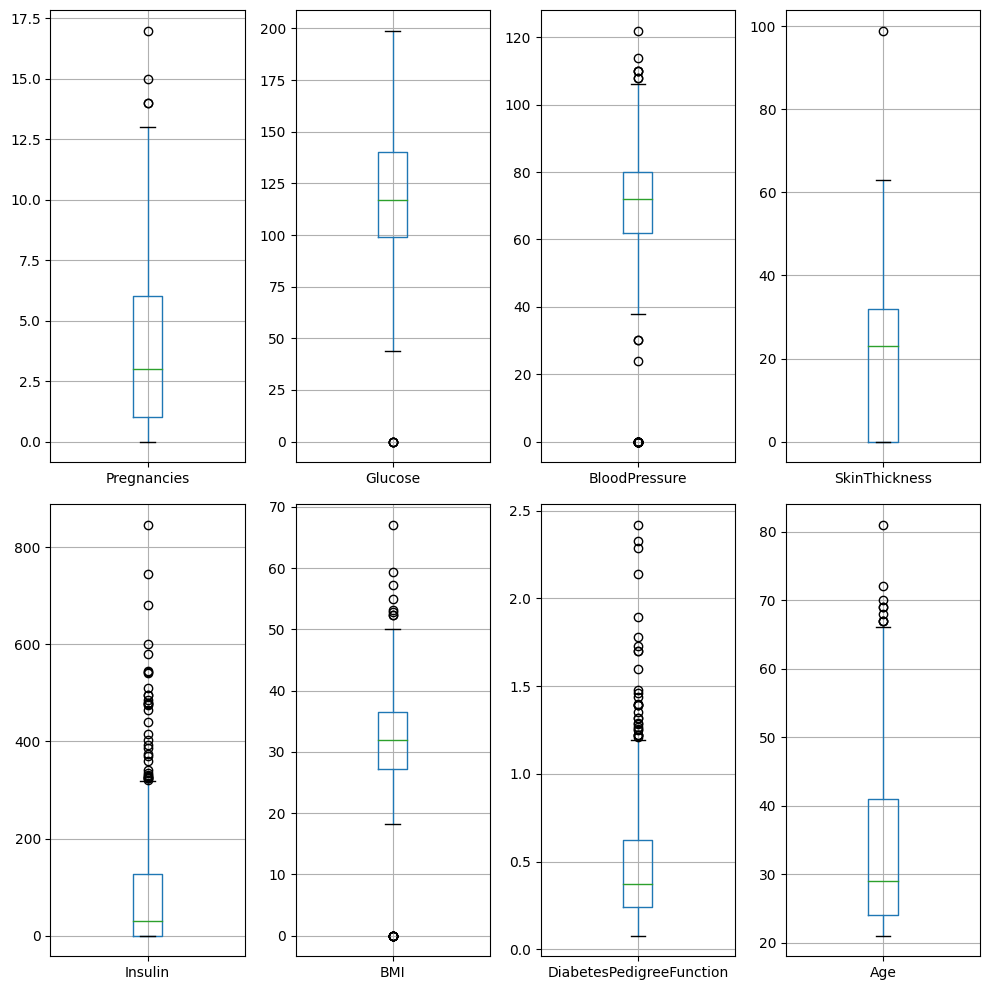

In [8]:
# Outlier Checking

list_columns = list(df.columns.values)

num_rows = 2
num_cols = 4

fig, ax = plt.subplots(num_rows, num_cols, figsize=(10,10))

for i, column_name in enumerate(list_columns):
    df.boxplot(column_name, ax=ax.flatten()[i])
    

plt.tight_layout()
plt.show()

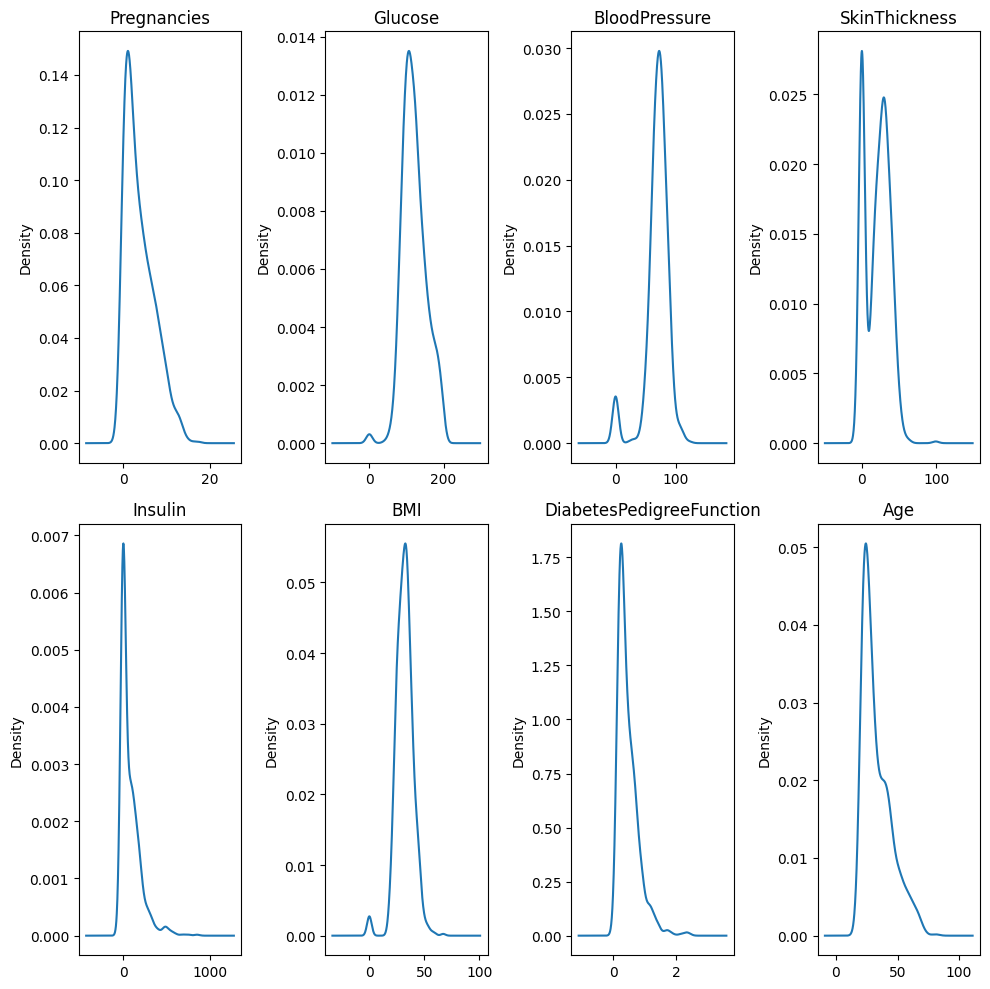

In [9]:
# Distribution of Data
 
list_columns = list(df.columns.values)

num_rows = 2
num_cols = 4

fig, ax = plt.subplots(num_rows, num_cols, figsize=(10,10))

for i, column_name in enumerate(list_columns):
    df[column_name].plot(ax=ax.flatten()[i], kind='kde')
    ax.flatten()[i].set_title(column_name)

plt.tight_layout()
plt.show()

# Data Pre-processing 

In [10]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000


In [11]:
from sklearn.preprocessing import QuantileTransformer

quantile_trans = QuantileTransformer(n_quantiles=df.shape[0], output_distribution='normal')
df_scaled = quantile_trans.fit_transform(df)

In [12]:
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.667327,0.879002,0.042498,0.848159,-5.199338,0.230799,0.677570,1.225627
1,-0.729902,-1.294285,-0.422375,0.371103,-5.199338,-0.747073,-0.060497,0.147598
2,1.097346,1.716615,-0.585788,-5.199338,-5.199338,-1.329045,0.779878,0.215722
3,-0.729902,-1.121536,-0.422375,0.014707,0.420590,-0.528530,-1.246676,-5.199338
4,-5.199338,0.587729,-1.636692,0.848159,0.971779,1.453722,2.793437,0.269580
...,...,...,...,...,...,...,...,...
763,1.560490,-0.570338,0.385144,2.023469,1.053642,0.132747,-1.222172,1.986876
764,-0.286564,0.155863,-0.122862,0.232478,-5.199338,0.708737,-0.109701,-0.222417
765,0.462019,0.124509,0.042498,0.014707,0.558840,-0.795477,-0.659183,0.073599
766,-0.729902,0.305344,-0.910704,-5.199338,-5.199338,-0.252672,-0.065408,1.112388


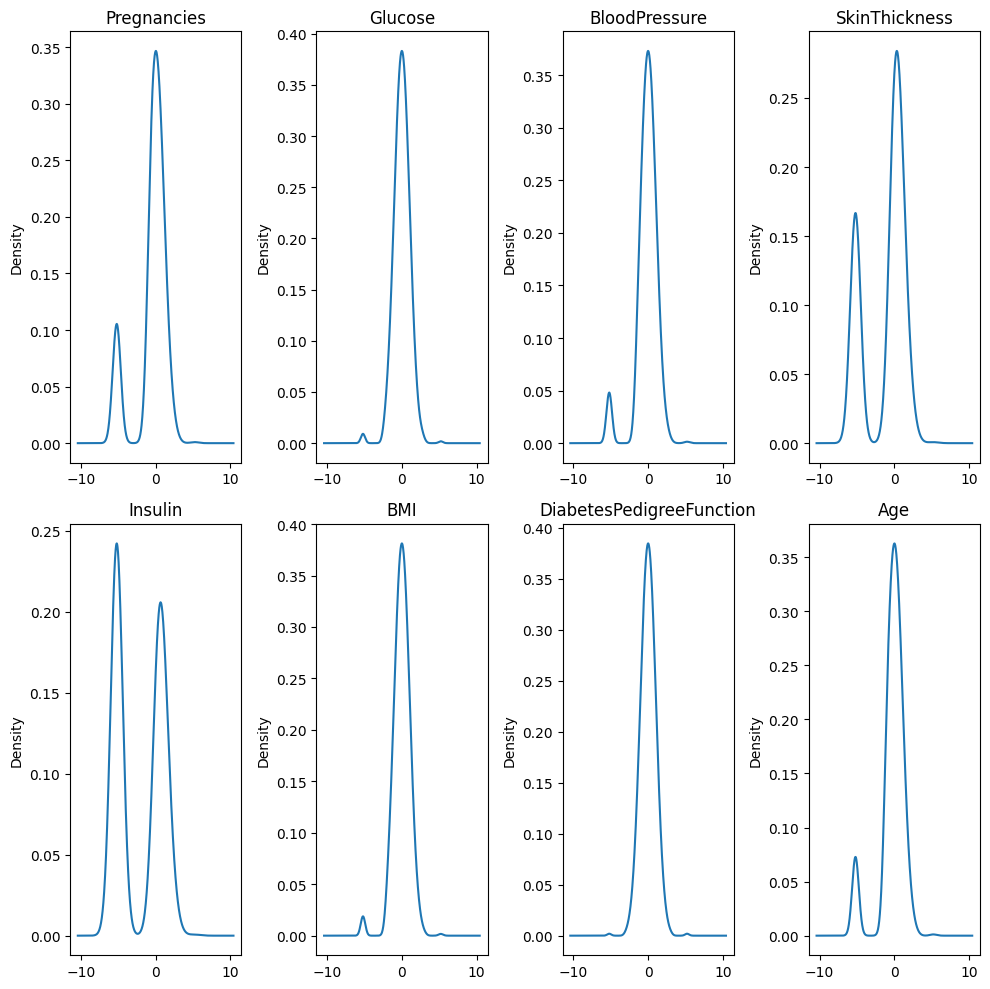

In [13]:
list_columns = list(df_scaled.columns.values)

num_rows = 2
num_cols = 4

fig, ax = plt.subplots(num_rows, num_cols, figsize=(10,10))

for i, column_name in enumerate(list_columns):
    df_scaled[column_name].plot(ax=ax.flatten()[i], kind='kde')
    ax.flatten()[i].set_title(column_name)

plt.tight_layout()
plt.show()

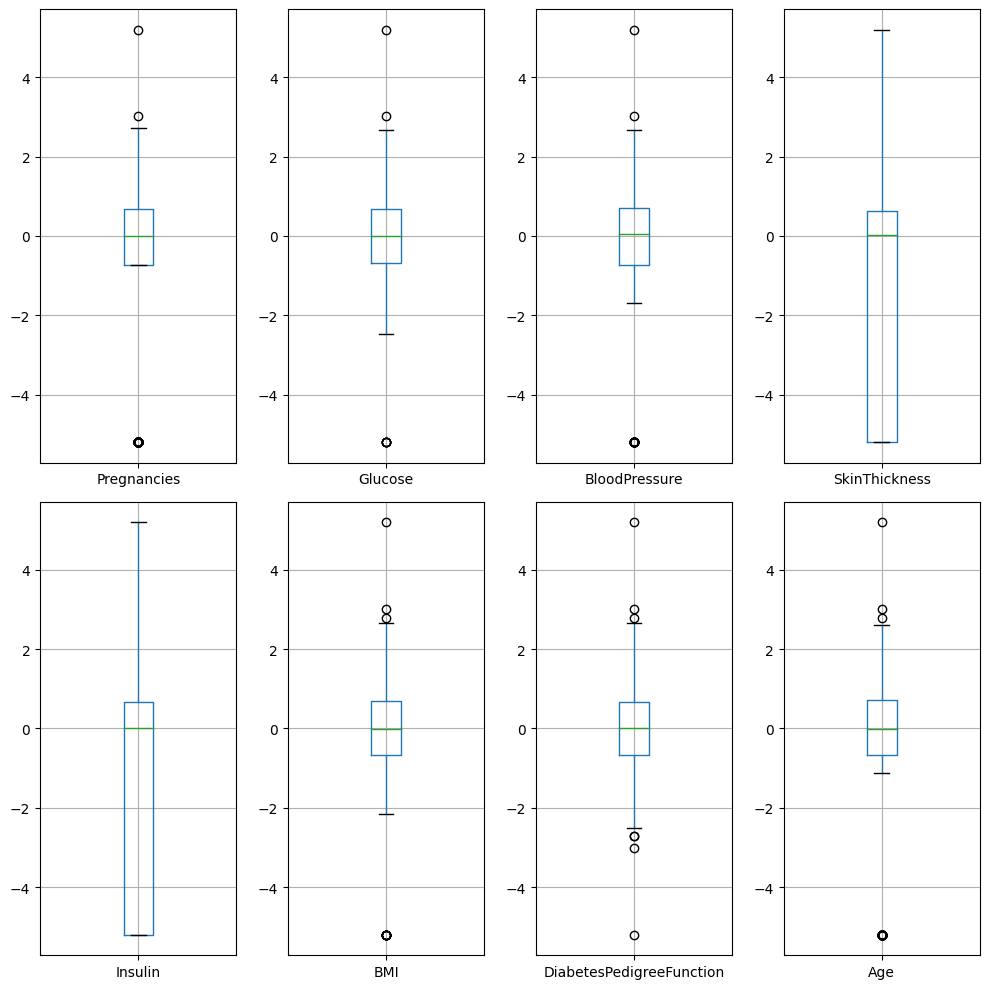

In [14]:
list_columns = list(df_scaled.columns.values)

num_rows = 2
num_cols = 4

fig, ax = plt.subplots(num_rows, num_cols, figsize=(10, 10))

for i, column_name in enumerate(list_columns):
    df_scaled.boxplot(column_name, ax=ax.flatten()[i])

plt.tight_layout()
plt.show()

In [15]:
# Outlier Persentation

for i, j in df_scaled.items():
    q1 = j.quantile(0.25)
    q3 = j.quantile(0.75)
    inter_q = q3 - q1

    j_col = j[(j <= q1 - 1.5 * inter_q) | (j >= q3 + 1.5 * inter_q)]
    percent = np.shape(j_col)[0] * 100.0 / np.shape(df)[0]
    print("Column %s outliers = %.2f" %(i, percent))

Column Pregnancies outliers = 14.71
Column Glucose outliers = 0.91
Column BloodPressure outliers = 4.82
Column SkinThickness outliers = 0.00
Column Insulin outliers = 0.00
Column BMI outliers = 1.82
Column DiabetesPedigreeFunction outliers = 0.91
Column Age outliers = 8.59


In [16]:
Q1 = df_scaled.quantile(0.25)
Q3 = df_scaled.quantile(0.75)
IQR = Q3 - Q1

new_df_filtered = df_scaled[~((df_scaled < (Q1 - 1.5 * IQR)) | (df_scaled > (Q3 + 1.5 * IQR))).any(axis=1)]
print(new_df_filtered)

     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.667327  0.879002       0.042498       0.848159 -5.199338  0.230799   
1      -0.729902 -1.294285      -0.422375       0.371103 -5.199338 -0.747073   
2       1.097346  1.716615      -0.585788      -5.199338 -5.199338 -1.329045   
5       0.462019 -0.024513       0.200693      -5.199338 -5.199338 -0.893522   
6       0.008170 -1.682002      -1.444384       0.629021  0.367604 -0.131098   
..           ...       ...            ...            ...       ...       ...   
763     1.560490 -0.570338       0.385144       2.023469  1.053642  0.132747   
764    -0.286564  0.155863      -0.122862       0.232478 -5.199338  0.708737   
765     0.462019  0.124509       0.042498       0.014707  0.558840 -0.795477   
766    -0.729902  0.305344      -0.910704      -5.199338 -5.199338 -0.252672   
767    -0.729902 -0.925649      -0.122862       0.532291 -5.199338 -0.219068   

     DiabetesPedigreeFunction       Age

In [17]:
new_df_filtered = pd.DataFrame(new_df_filtered, columns=df_scaled.columns)

new_df_filtered

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.667327,0.879002,0.042498,0.848159,-5.199338,0.230799,0.677570,1.225627
1,-0.729902,-1.294285,-0.422375,0.371103,-5.199338,-0.747073,-0.060497,0.147598
2,1.097346,1.716615,-0.585788,-5.199338,-5.199338,-1.329045,0.779878,0.215722
5,0.462019,-0.024513,0.200693,-5.199338,-5.199338,-0.893522,-0.966552,0.073599
6,0.008170,-1.682002,-1.444384,0.629021,0.367604,-0.131098,-0.633009,-0.334583
...,...,...,...,...,...,...,...,...
763,1.560490,-0.570338,0.385144,2.023469,1.053642,0.132747,-1.222172,1.986876
764,-0.286564,0.155863,-0.122862,0.232478,-5.199338,0.708737,-0.109701,-0.222417
765,0.462019,0.124509,0.042498,0.014707,0.558840,-0.795477,-0.659183,0.073599
766,-0.729902,0.305344,-0.910704,-5.199338,-5.199338,-0.252672,-0.065408,1.112388


# PEMODELAN

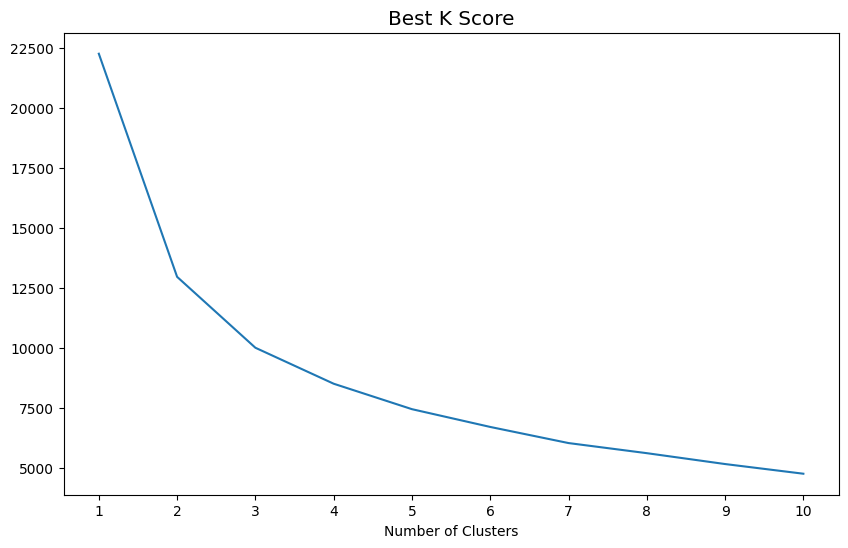

In [18]:
from sklearn.cluster import KMeans

score = []
k_value = range(1, 11)

for k in k_value:
    kmeans = KMeans(n_clusters= k, init='k-means++', random_state=42)
    kmeans.fit(df_scaled)
    cluster = kmeans.fit_predict(df_scaled)
    score.append(kmeans.inertia_)

fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(k_value, score)
plt.xlabel('Number of Clusters')
plt.xticks(k_value)
plt.style.use('ggplot')
plt.title('Best K Score')
plt.show()

 For k = 2, the silhouette score is: [0.4048537046129071]
 For k = 3, the silhouette score is: [0.40208476669810983]
 For k = 4, the silhouette score is: [0.40347799363658493]
 For k = 5, the silhouette score is: [0.4178479290864205]
 For k = 6, the silhouette score is: [0.4351560633290154]
 For k = 7, the silhouette score is: [0.44724621172934825]
 For k = 8, the silhouette score is: [0.319647973263917]


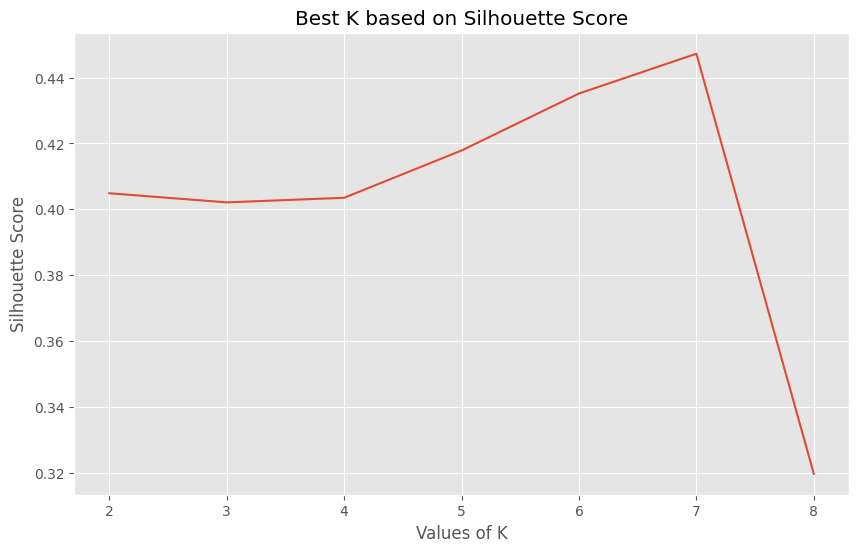

In [19]:
# Calculate Silhouette Score (Outlier dihapus)

from sklearn.metrics import silhouette_score

k_value = [2, 3, 4, 5, 6, 7, 8]
scores = {}

for k in k_value:
    kmeans = KMeans(n_clusters = k, random_state=42)
    kmeans.fit(df_scaled)
    cluster_labels = kmeans.predict(df_scaled)

    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    scores[k] = [silhouette_avg]

for k, value in scores.items():
    print(" For k = {}, the silhouette score is: {}".format(k, value))

key = list(scores.keys())
value = list(scores.values())

fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(key, value)
plt.xlabel('Values of K')
plt.xticks(k_value)
plt.ylabel('Silhouette Score')
plt.style.use('ggplot')
plt.title('Best K based on Silhouette Score')
plt.show()

In [20]:
from sklearn.metrics import davies_bouldin_score

k_value = [2, 3, 4, 5, 6, 7, 8]
scores = {}

for k in k_value:
    kmeans = KMeans(n_clusters = k, random_state=42)
    kmeans.fit(df_scaled)
    cluster_labels = kmeans.predict(df_scaled)

    db_score = davies_bouldin_score(df_scaled, cluster_labels)
    scores[k] = [db_score]

for k, value in scores.items():
    print(" For k = {}, the davies-bouldin score is: {}".format(k, value))

 For k = 2, the davies-bouldin score is: [1.085899251494821]
 For k = 3, the davies-bouldin score is: [1.134299396399394]
 For k = 4, the davies-bouldin score is: [1.2108166736246617]
 For k = 5, the davies-bouldin score is: [1.18993105737414]
 For k = 6, the davies-bouldin score is: [1.0450857995102092]
 For k = 7, the davies-bouldin score is: [1.0344055384601454]
 For k = 8, the davies-bouldin score is: [1.2133680681016594]


In [21]:
kmeans = KMeans(n_clusters=7, init='k-means++', n_init=10, max_iter=10000, random_state=42)
kmeans.fit(df_scaled)
df_scaled['cluster'] = kmeans.labels_

df_scaled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,cluster
0,0.667327,0.879002,0.042498,0.848159,-5.199338,0.230799,0.677570,1.225627,4
1,-0.729902,-1.294285,-0.422375,0.371103,-5.199338,-0.747073,-0.060497,0.147598,4
2,1.097346,1.716615,-0.585788,-5.199338,-5.199338,-1.329045,0.779878,0.215722,3
3,-0.729902,-1.121536,-0.422375,0.014707,0.420590,-0.528530,-1.246676,-5.199338,0
4,-5.199338,0.587729,-1.636692,0.848159,0.971779,1.453722,2.793437,0.269580,5
...,...,...,...,...,...,...,...,...,...
763,1.560490,-0.570338,0.385144,2.023469,1.053642,0.132747,-1.222172,1.986876,1
764,-0.286564,0.155863,-0.122862,0.232478,-5.199338,0.708737,-0.109701,-0.222417,4
765,0.462019,0.124509,0.042498,0.014707,0.558840,-0.795477,-0.659183,0.073599,1
766,-0.729902,0.305344,-0.910704,-5.199338,-5.199338,-0.252672,-0.065408,1.112388,3


<Figure size 800x800 with 0 Axes>

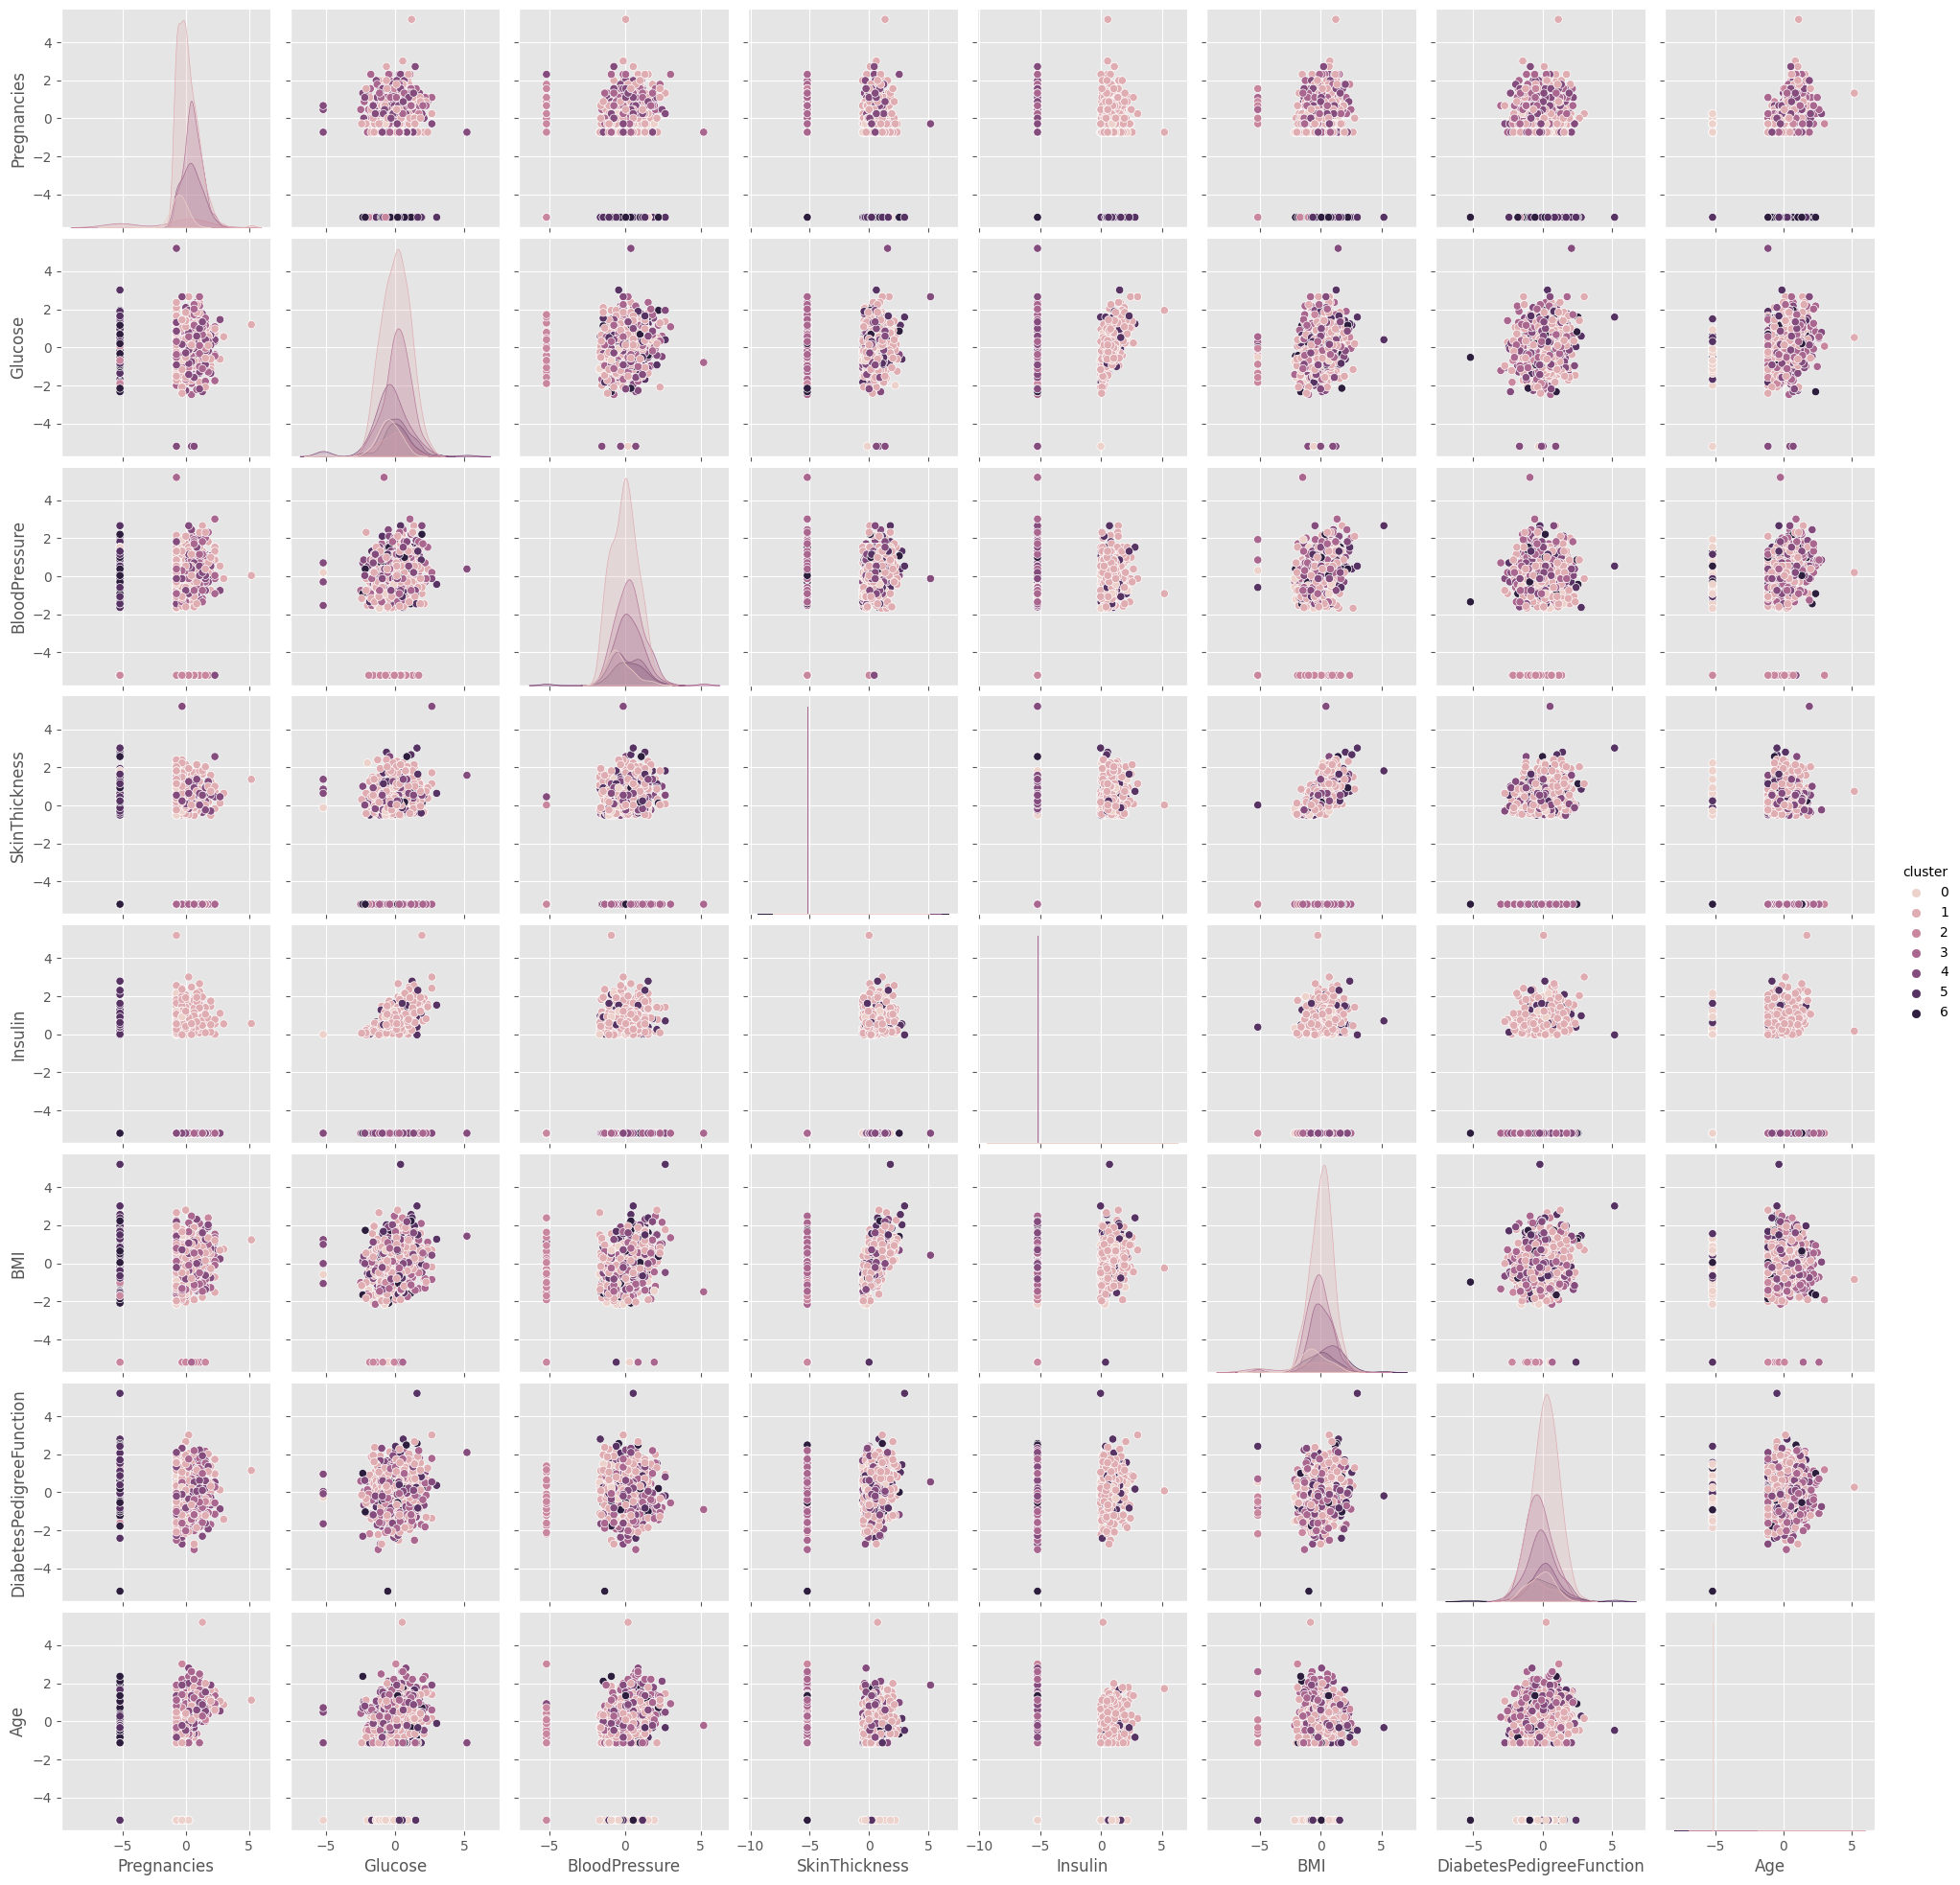

In [22]:
import seaborn as sns 

plt.figure(figsize=(8,8))
sns.pairplot(data=df_scaled, hue='cluster')

In [23]:
df_pca = df_scaled.loc[:, ~df_scaled.columns.isin(['cluster'])]
df_pca

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.667327,0.879002,0.042498,0.848159,-5.199338,0.230799,0.677570,1.225627
1,-0.729902,-1.294285,-0.422375,0.371103,-5.199338,-0.747073,-0.060497,0.147598
2,1.097346,1.716615,-0.585788,-5.199338,-5.199338,-1.329045,0.779878,0.215722
3,-0.729902,-1.121536,-0.422375,0.014707,0.420590,-0.528530,-1.246676,-5.199338
4,-5.199338,0.587729,-1.636692,0.848159,0.971779,1.453722,2.793437,0.269580
...,...,...,...,...,...,...,...,...
763,1.560490,-0.570338,0.385144,2.023469,1.053642,0.132747,-1.222172,1.986876
764,-0.286564,0.155863,-0.122862,0.232478,-5.199338,0.708737,-0.109701,-0.222417
765,0.462019,0.124509,0.042498,0.014707,0.558840,-0.795477,-0.659183,0.073599
766,-0.729902,0.305344,-0.910704,-5.199338,-5.199338,-0.252672,-0.065408,1.112388


In [24]:
df_scaled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,cluster
0,0.667327,0.879002,0.042498,0.848159,-5.199338,0.230799,0.677570,1.225627,4
1,-0.729902,-1.294285,-0.422375,0.371103,-5.199338,-0.747073,-0.060497,0.147598,4
2,1.097346,1.716615,-0.585788,-5.199338,-5.199338,-1.329045,0.779878,0.215722,3
3,-0.729902,-1.121536,-0.422375,0.014707,0.420590,-0.528530,-1.246676,-5.199338,0
4,-5.199338,0.587729,-1.636692,0.848159,0.971779,1.453722,2.793437,0.269580,5
...,...,...,...,...,...,...,...,...,...
763,1.560490,-0.570338,0.385144,2.023469,1.053642,0.132747,-1.222172,1.986876,1
764,-0.286564,0.155863,-0.122862,0.232478,-5.199338,0.708737,-0.109701,-0.222417,4
765,0.462019,0.124509,0.042498,0.014707,0.558840,-0.795477,-0.659183,0.073599,1
766,-0.729902,0.305344,-0.910704,-5.199338,-5.199338,-0.252672,-0.065408,1.112388,3


In [25]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_pca)

df_pca

array([[-1.14554027, -1.74043693],
       [-1.46321262,  0.31362924],
       [-5.05920363, -1.23162654],
       ...,
       [ 2.61768015, -1.22171718],
       [-5.01498099, -0.04019353],
       [-1.23185587,  0.70588478]])

In [26]:
df_pca = pd.DataFrame(df_pca, columns=['PC 1', 'PC2'])
df_pca['cluster'] = df_scaled.loc[:, df_scaled.columns.isin(['cluster'])]

df_pca

,PC 1,PC2,cluster
0,-1.145540,-1.740437,4
1,-1.463213,0.313629,4
2,-5.059204,-1.231627,3
3,2.910880,2.651480,0
4,4.141959,3.406291,5
...,...,...,...
763,4.089015,-3.268102,1
764,-1.400042,-0.107764,4
765,2.617680,-1.221717,1
766,-5.014981,-0.040194,3


<Figure size 800x800 with 0 Axes>

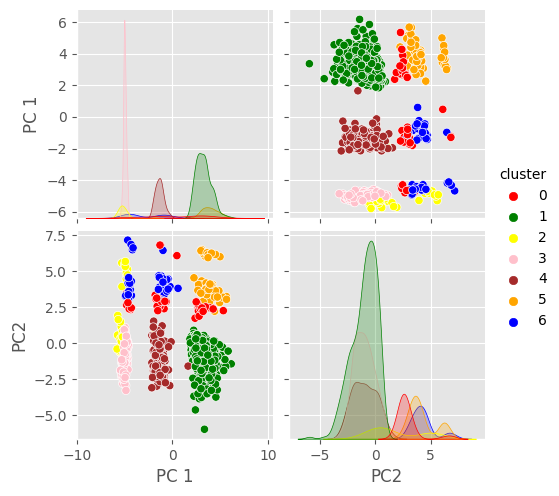

In [27]:
import seaborn as sns 

plt.figure(figsize=(8,8))
sns.pairplot(data=df_pca, hue='cluster', palette=['red', 'green', 'yellow', 'pink', 'brown', 'orange', 'blue'])